<a href="https://colab.research.google.com/github/dtnam302/CV/blob/main/MNIST_SIGN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Download data

In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/CV


/content/drive/MyDrive/Colab Notebooks/CV


In [ ]:
#!wget 
#!gdown

In [ ]:
#!unzip sign_mnist_test.csv.zip

In [ ]:
#!unzip sign_mnist_train.csv.zip

##Introduction to MNSIT Sign Dataset

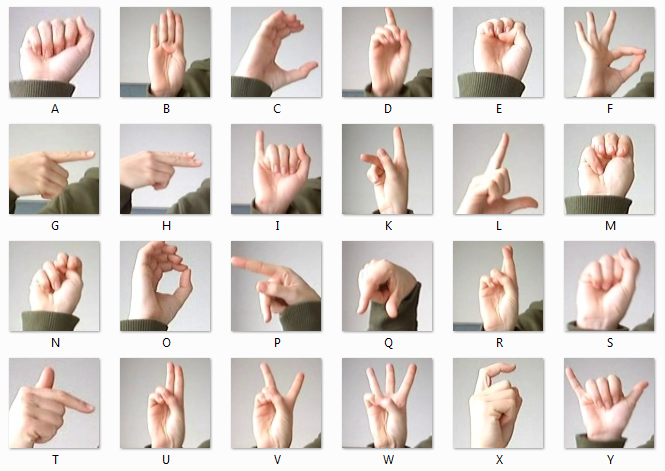

In [2]:
from IPython.display import Image
Image("demo.png")




##EDA

In [42]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

In [4]:
def read_data(train_path,test_path):
  train = pd.read_csv(train_path)
  test = pd.read_csv(test_path)
  label_train = train['label']
  label_test = test['label']
  train.drop('label', axis = 1, inplace = True)
  test.drop('label', axis = 1, inplace = True)
  x_train = train.values.reshape(train.shape[0],28,28,1)
  x_test = test.values.reshape(test.shape[0],28,28,1)
  return (x_train,label_train),(x_test,label_test)

In [210]:
(x_train,label_train),(x_test,label_test) = read_data('sign_mnist_train.csv','sign_mnist_test.csv')

In [6]:
x_train.shape,label_train.shape

((27455, 28, 28, 1), (27455,))

In [7]:
def convert_label_to_char(x):
  return chr(x+65)

convert_label_to_char(0)

'A'

In [8]:
num_classes = 25

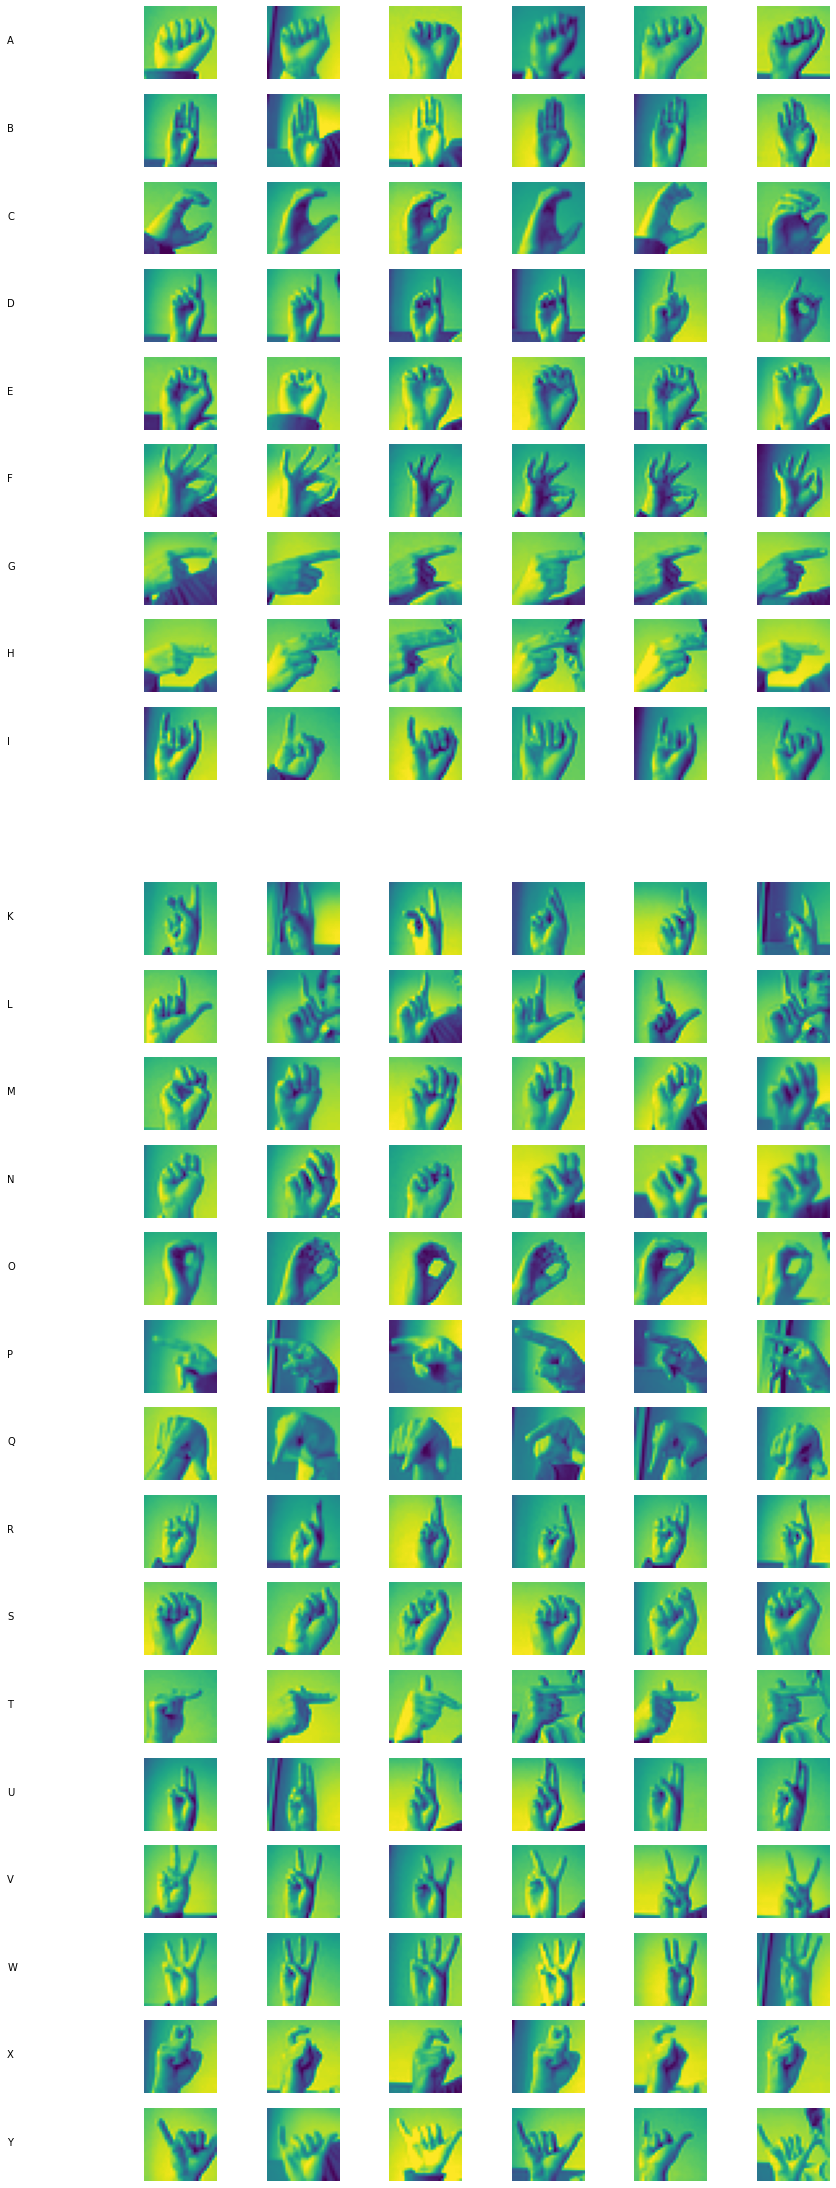

In [9]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(num_classes, 7) # 1 for label, 6 samples each label
data_index = [np.where(np.array(label_train)==classid)[0] for classid in range(num_classes)]
data_set_fig = plt.figure(num=1,figsize=(15, 40))
ax = []
for class_id in range(num_classes):
    if class_id != 9: #not J in dataset
      ax.append(data_set_fig.add_subplot(gs[class_id, 0]))
      ax[-1].text(0, 0.6, convert_label_to_char(class_id), ha='left', va='top', wrap=True)
      ax[-1].set_axis_off()

      index = np.random.choice(data_index[class_id], 6,replace=False)
      for sample in range(6):
          image = x_train[index[sample]].squeeze()
          ax.append(data_set_fig.add_subplot(gs[class_id, sample+1]))
          ax[-1].imshow(image)
          ax[-1].set_axis_off()


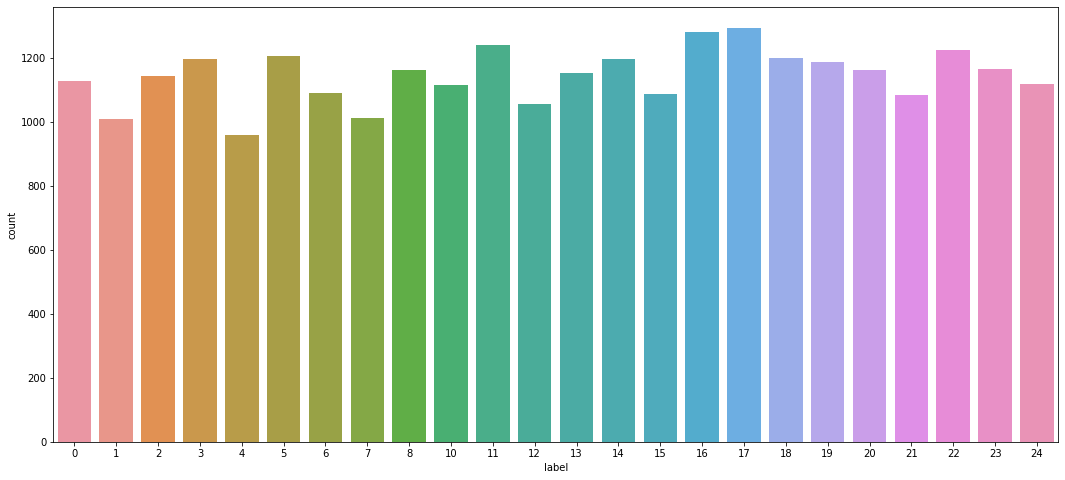

In [10]:
# explore the label distribution of training images
plt.figure(figsize = (18,8))
sns.countplot(x =label_train)

##Preprocessing data

In [11]:
def preprocessing(x,labels,val_size):
  labels = to_categorical(labels)
  x_train, x_val, y_train, y_val = train_test_split(x, labels, test_size = val_size, random_state = 2)
  x_train = x_train / 255.0
  x_val = x_val / 255.0
  return (x_train,y_train),(x_val,y_val)


In [12]:
(x_train,y_train),(x_val,y_val) = preprocessing(x_train,label_train,0.2)

In [13]:
print(x_train.shape)
print(x_val.shape)

(21964, 28, 28, 1)
(5491, 28, 28, 1)


##Build CNN model

In [14]:
input_shape = (28,28,1)

In [15]:
# Build Model
def model(f1,f2,f3,input_shape):

  model = models.Sequential()
  model.add(layers.Conv2D(f1, kernel_size=(3,3), padding='same', activation = 'relu', input_shape=input_shape ))
  model.add(layers.MaxPooling2D(pool_size = (2, 2)))

  model.add(layers.Conv2D(f2, kernel_size = (3, 3), padding='same', activation = 'relu'))
  model.add(layers.MaxPooling2D(pool_size = (2, 2)))

  model.add(layers.Conv2D(f3, kernel_size = (3, 3), padding='same', activation = 'relu'))
  model.add(layers.MaxPooling2D(pool_size = (2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation = 'relu'))
  model.add(layers.Dropout(0.20))
  model.add(layers.Dense(num_classes, activation = 'softmax'))
  return model


In [16]:
model = model(64,64,64,input_shape=input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [17]:
# Compile Model

def compile(model,loss,opt,metrics):
  model.compile(loss = loss, optimizer = opt , metrics = metrics)
  return model
  #model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

##Train model

In [18]:
from tensorflow import keras
loss = keras.losses.CategoricalCrossentropy()
opt = keras.optimizers.Adam()
metrics = ['accuracy',keras.metrics.Precision(),keras.metrics.Recall()]
model = compile(model,loss=loss,opt=opt,metrics=metrics)

In [19]:
# Train Model
batch_size = 128
num_epochs = 20

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data = (x_val, y_val))

Epoch 1/20
172/172 [==============================] - 34s 21ms/step - loss: 2.1234 - accuracy: 0.3567 - precision: 0.8021 - recall: 0.1884 - val_loss: 0.7495 - val_accuracy: 0.7651 - val_precision: 0.8767 - val_recall: 0.6281
Epoch 2/20
172/172 [==============================] - 3s 16ms/step - loss: 0.4874 - accuracy: 0.8393 - precision: 0.9004 - recall: 0.7713 - val_loss: 0.1572 - val_accuracy: 0.9627 - val_precision: 0.9769 - val_recall: 0.9415
Epoch 3/20
172/172 [==============================] - 3s 16ms/step - loss: 0.1677 - accuracy: 0.9478 - precision: 0.9604 - recall: 0.9313 - val_loss: 0.0386 - val_accuracy: 0.9944 - val_precision: 0.9956 - val_recall: 0.9936
Epoch 4/20
172/172 [==============================] - 3s 16ms/step - loss: 0.0784 - accuracy: 0.9780 - precision: 0.9809 - recall: 0.9730 - val_loss: 0.0109 - val_accuracy: 0.9996 - val_precision: 0.9996 - val_recall: 0.9995
Epoch 5/20
172/172 [==============================] - 3s 16ms/step - loss: 0.0416 - accuracy: 0.989

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


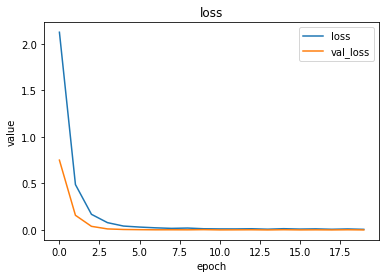

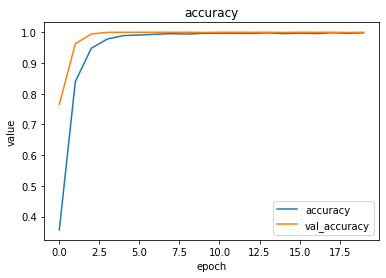

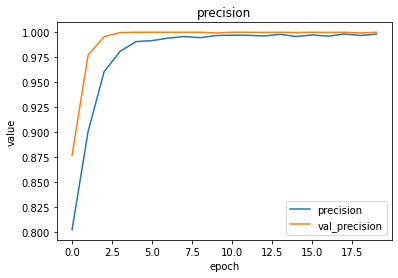

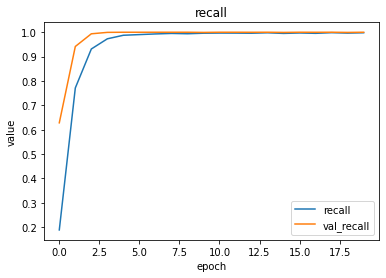

In [32]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,t1,t2): 
    plt.plot(hisData.history[t1])
    plt.plot(hisData.history[t2])
    plt.title(t1)
    plt.ylabel('value')
    plt.xlabel('epoch')
    plt.legend([t1, t2])
    plt.show()


show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')
show_train_history(history, 'precision', 'val_precision')
show_train_history(history, 'recall', 'val_recall')

##Evaluate

In [150]:
# Test Accuracy
y_test = to_categorical(label_test)
score = model.evaluate(x_test, y_test, verbose = 0)
print("Loss: {:6.2f}, Accuracy: {:6.2f}%".format(score[0],score[1]*100))

Loss:  68.67, Accuracy:  94.42%


###Confusion Matrix

In [70]:
y_pred = model.predict(x_test)
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [71]:
from sklearn.metrics import confusion_matrix
y_pred = (y_pred > 0.5) 
y_pred=np.argmax(y_pred, axis=1)
#y_test=np.argmax(y_test, axis=1)
cf_matrix = confusion_matrix(y_test, y_pred)

[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]


In [79]:
import itertools
from sklearn.metrics import confusion_matrix

"""
Ref : http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


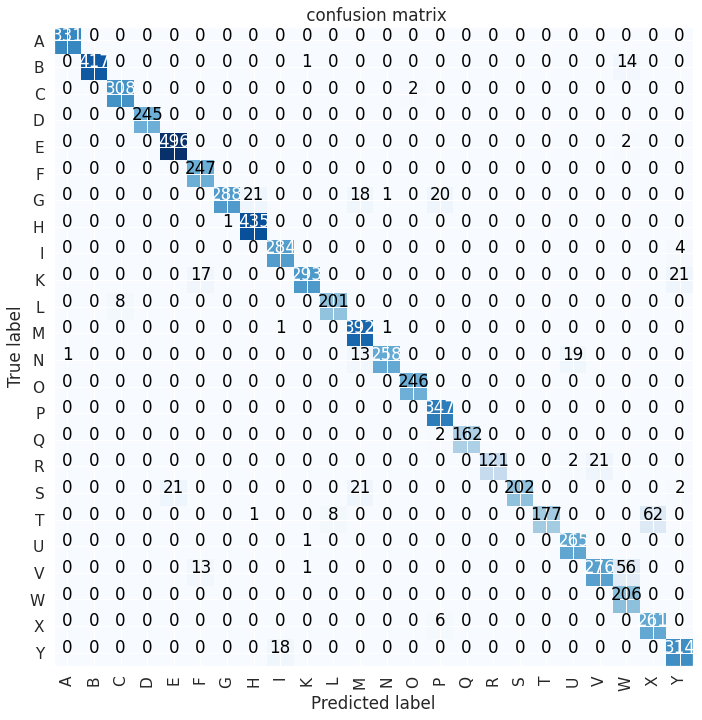

In [80]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cf_matrix, classes=[convert_label_to_char(i) for i in range(25) if i !=9], title=' confusion matrix')

###Top 10

In [223]:
def get_index_predictions(model,x_test,label_test):
  results = model.predict(x_test)
  results = np.argmax(results,axis=1)
  wrong_predictions = []
  true_predictions = []
  for index,ele in enumerate(results):
    if label_test[index] != results[index]:

      wrong_predictions.append({'prob':ele[np.argmax(ele)],'index':index})
    else:
      true_predictions.append({'prob':ele[np.argmax(ele)],'index':index})
  return true_predictions,wrong_predictions


In [200]:
true_pred,wrong_pred = get_index_predictions(model,x_test,label_test)

In [201]:
len(wrong_pred),len(true_pred)

(400, 6772)

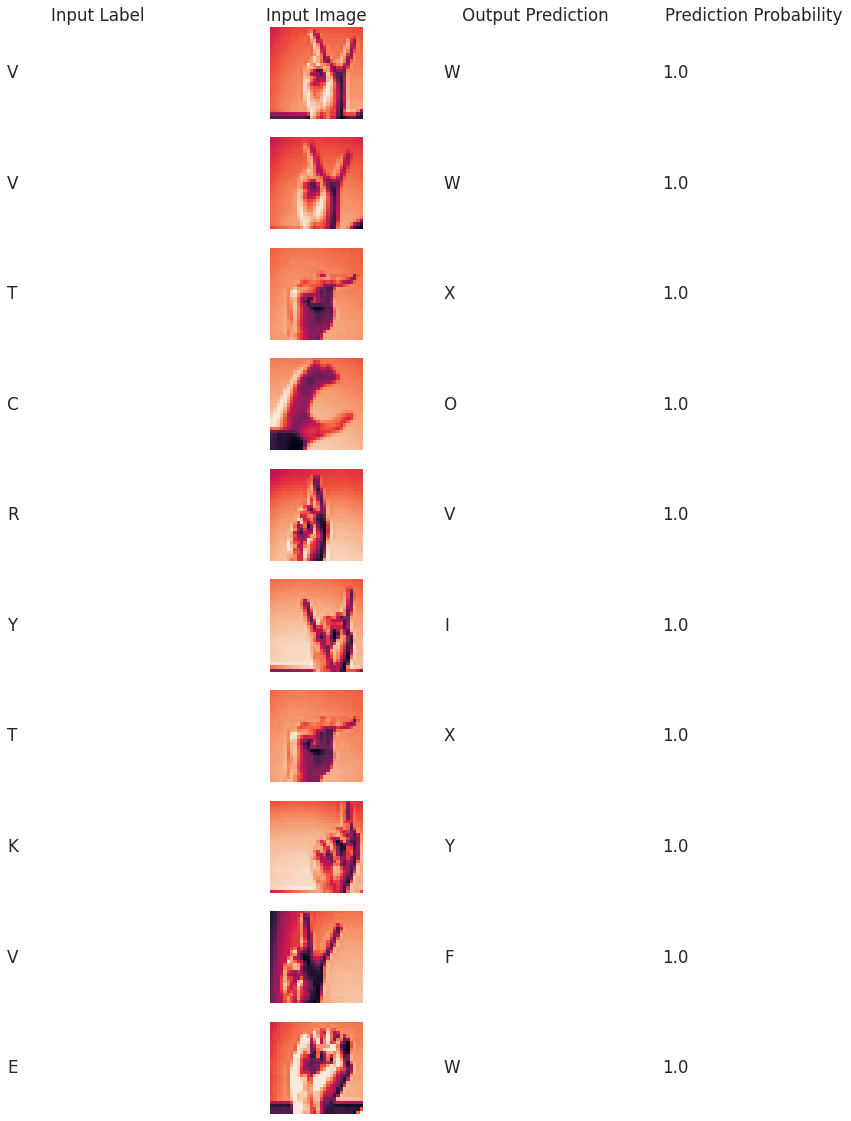

In [224]:

images = wrong_pred[:10]
test_gs = gridspec.GridSpec(10, 4)

# plot samples for each traffic signs 
data_set_fig = plt.figure(figsize=(15, 20))
# st = data_set_fig.suptitle("Training  DataSet Samples", fontsize="x-large")
ax = []
for img_id in range(len(images)):
    # plot Input Image and label
    ax.append(data_set_fig.add_subplot(test_gs[img_id, 0]))
    ax[-1].text(0, 0.6, convert_label_to_char(label_test[images[img_id]['index']]), ha='left', va='top', wrap=True)
    ax[-1].set_axis_off()
    if img_id == 0:
        plt.title('Input Label')
    ax.append(data_set_fig.add_subplot(test_gs[img_id, 1]))
    ax[-1].imshow(x_test[images[img_id]['index']].squeeze())
    ax[-1].set_axis_off()
    if img_id == 0:
        plt.title('Input Image')
    #plot predected sign image and accuarcy 
    ax.append(data_set_fig.add_subplot(test_gs[img_id, 2]))
    ax[-1].text(0, 0.6, convert_label_to_char(results[images[img_id]['index']]), ha='left', va='top', wrap=True)
    ax[-1].set_axis_off()
    if img_id == 0:
        plt.title('Output Prediction')
    ax.append(data_set_fig.add_subplot(test_gs[img_id, 3]))
    ax[-1].text(0, 0.6, wrong_pred[img_id]['prob'], ha='left', va='top', wrap=True)
    ax[-1].set_axis_off()
    if img_id == 0:
        plt.title('Prediction Probability')